In [28]:
import numpy as np

In [31]:
class Perceptron:
    """Perceptron classifier.
        Parameters
        ------------
        eta : float
        Learning rate (between 0.0 and 1.0)
        n_iter : int
        Passes over the training dataset.
        Attributes
        -----------
        w_ : 1d-array
        Weights after fitting.
        errors_ : list
        Number of misclassifications in every epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = np.zeros(1 + X.shape[1])

        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [39]:
import pandas

df = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [40]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [75]:
import matplotlib.pyplot as plot
from matplotlib.colors import ListedColormap
import numpy

In [54]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [57]:
plot.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plot.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plot.xlabel('petal length')
plot.ylabel('sepal length')
plot.legend(loc='upper left')

In [73]:
percept = Perceptron(eta=0.1, n_iter=10)
percept.fit(X, y)
plot.plot(range(1, len(percept.errors_) + 1), percept.errors_,marker='o')
plot.xlabel('Epohs')
plot.ylabel('Misclassifications')

plot.show()

In [82]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plot.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plot.xlim(xx1.min(), xx1.max())
    plot.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plot.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

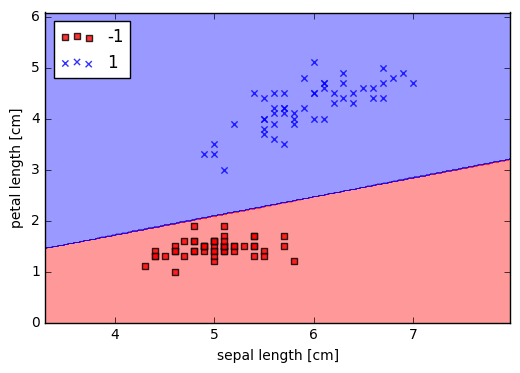

In [83]:
plot_decision_regions(X, y, classifier=percept)
plot.xlabel('sepal length [cm]')
plot.ylabel('petal length [cm]')
plot.legend(loc='upper left')
plot.show()

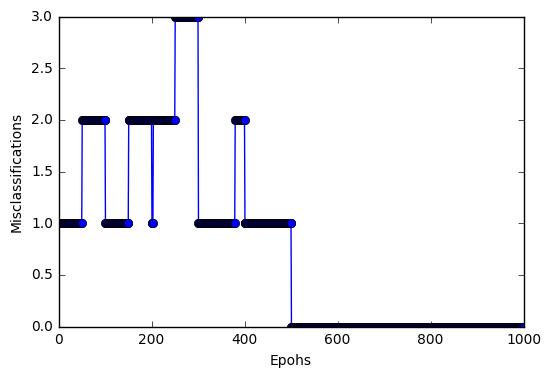

,One,Zero
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0
